<a href="https://colab.research.google.com/github/Dashnyam7/DIC_assignment/blob/main/Decision_tree_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1] Function to find impurity

In [1]:
def _calc_gini(self,y):
    labels,counts = np.unique(y,return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini

# [Problem 2] Function for obtaining information gain

In [2]:
def _calc_ig(self,X,feature_index,y,threshold):
    labels_l = y[X[:,feature_index] < threshold]
    labels_r = y[X[:,feature_index] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self.calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self.calc_gini(labels_r)
    gain = self.calc_gini(y) -gain_l -gain_r
    return gain

# [Question 3] Learning

In [3]:
    def fit(self, X, y):
        """
        Train a decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples, )
            Correct value of training data
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self.calc_gain(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

# [Problem 4] Presumption

In [4]:
    def predict(self, X):
        """
        Estimate labels using a decision tree classifier
        """
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction

# [Question 5] Learning and Estimation

In [11]:
import collections
import numpy as np
class ScratchDecesionTreeClassifier():
    """
    Scratch implementation of a decision tree classifier

    Parameters
    ----------
    verbose : bool
      True to print the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose

    def _calc_gini(self,y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
    
    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

    def fit(self, X, y):
        """
        Train a decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples, )
            Correct value of training data
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

    def predict(self, X):
        """
        Estimate labels using a decision tree classifier
        """
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction

In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
data, target = iris.data[:, 1:3], iris.target[:]
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=123, test_size=0.2)

In [46]:
clf = ScratchDecesionTreeClassifier(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold 2.2 gain [0.00505719]
feature 0 threshold 2.3 gain [0.00853927]
feature 0 threshold 2.4 gain [0.01123701]
feature 0 threshold 2.5 gain [0.02561869]
feature 0 threshold 2.7 gain [0.02794432]
feature 0 threshold 2.8 gain [0.04019899]
feature 0 threshold 2.9 gain [0.06465278]
feature 0 threshold 3.0 gain [0.094375]
feature 0 threshold 3.1 gain [0.10700563]
feature 0 threshold 3.4 gain [0.11510006]
feature 1 threshold 1.6 gain [0.20858871]
feature 1 threshold 1.7 gain [0.27252395]
feature 1 threshold 1.9 gain [0.30791667]
feature 1 threshold 3.0 gain [0.3202828]


In [47]:
train_prediction = clf.predict(X_train)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.53      1.00      0.69        44
           2       0.00      0.00      0.00        39

    accuracy                           0.68       120
   macro avg       0.51      0.67      0.56       120
weighted avg       0.50      0.68      0.56       120



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sklearn

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
pred = tree.predict(X_train)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.93      0.94        44
           2       0.93      0.95      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



# [Problem 6] Visualization of the decision region

In [56]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

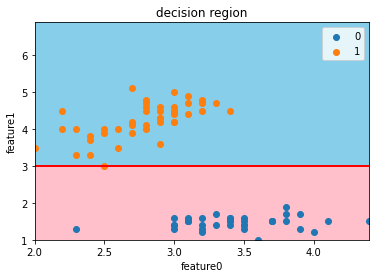

In [57]:
decision_region(X_train, y_train, clf)